In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

2023-02-10 21:26:55.103477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

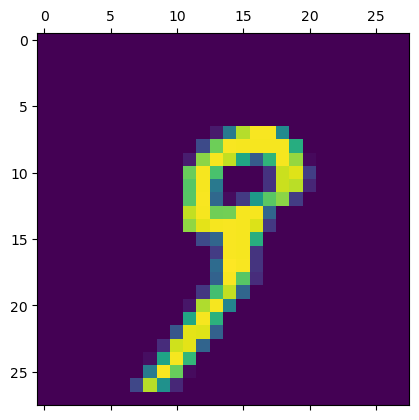

In [8]:
plt.matshow(X_train[19])

In [9]:
y_train[19]

9

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)

model.fit(X_train_flattened, y_train, epochs = 5)

2023-02-10 21:26:59.980813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 2s 795us/step - loss: 0.4679 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.3038 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 1s 595us/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 578us/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 589us/step - loss: 0.2667 - accuracy: 0.9253


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 516us/step - loss: 0.2693 - accuracy: 0.9254


[0.2693433165550232, 0.9254000186920166]

In [17]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 407us/step


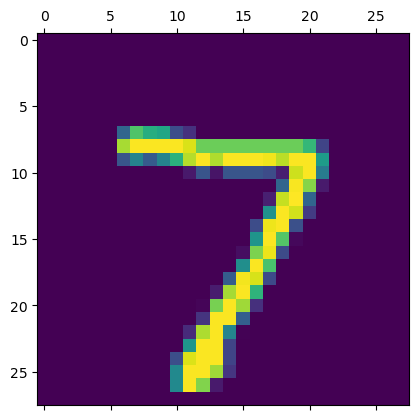

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted[0]

array([2.1244902e-02, 3.1392017e-07, 3.5739161e-02, 9.5196801e-01,
       3.4481939e-03, 1.2678140e-01, 7.3340686e-07, 9.9979728e-01,
       9.8466210e-02, 7.0391846e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

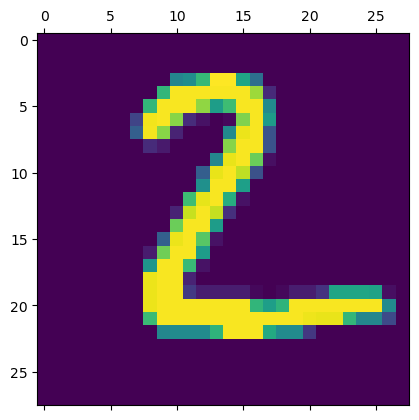

In [21]:
plt.matshow(X_test[1])

In [22]:
np.argmax(y_predicted[1])

2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    7,    3,    3,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,   12,  907,   17,   10,    6,   13,   11,   46,    3],
       [   4,    0,   15,  911,    1,   33,    2,   11,   26,    7],
       [   1,    1,    4,    1,  925,    0,    7,    3,   10,   30],
       [   7,    3,    1,   18,   10,  796,   14,    5,   31,    7],
       [  11,    3,    6,    1,    9,   20,  903,    2,    3,    0],
       [   1,    5,   20,    5,    9,    0,    0,  955,    3,   30],
       [   5,   10,    5,   19,    9,   32,    9,   12,  865,    8],
       [   9,    7,    1,    8,   32,   10,    0,   21,    5,  916]],
      dtype=int32)>

In [26]:
import seaborn as sns

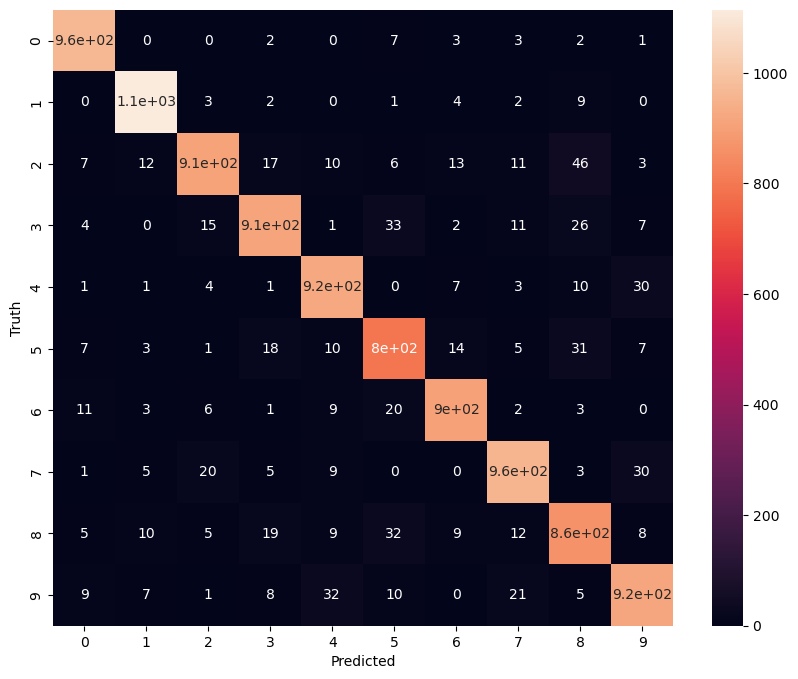

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Adding a hidden layer

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.2645 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.1188 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.0840 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.0644 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.0520 - accuracy: 0.9841


In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 665us/step - loss: 0.0781 - accuracy: 0.9738


[0.07811369746923447, 0.973800003528595]

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 568us/step


In [31]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm2 = tf.math.confusion_matrix(y_test, y_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    3,    0,    3,    1,    3,    0,    1,    4],
       [   0, 1120,    3,    2,    0,    0,    4,    0,    6,    0],
       [   4,    3,  998,    4,    3,    1,    1,    4,   13,    1],
       [   2,    0,    4,  984,    0,    2,    0,    5,    6,    7],
       [   1,    0,    3,    0,  954,    0,    4,    5,    2,   13],
       [   2,    2,    0,   14,    2,  857,    9,    2,    4,    0],
       [   3,    3,    1,    1,    3,    2,  943,    0,    2,    0],
       [   2,    3,    8,    5,    2,    0,    0,  999,    2,    7],
       [   8,    1,    3,    4,    5,    5,    5,    2,  934,    7],
       [   3,    2,    0,    5,    8,    1,    0,    6,    0,  984]],
      dtype=int32)>

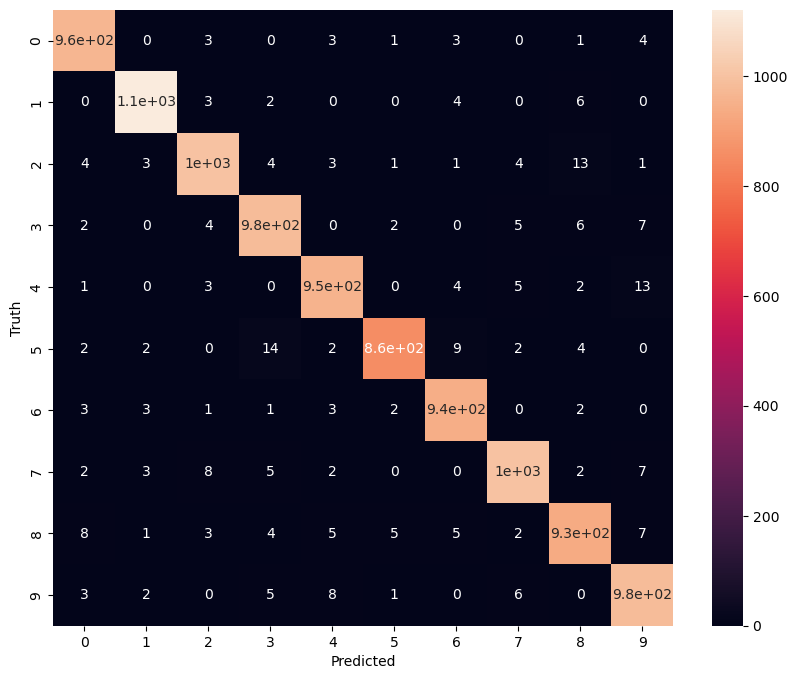

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(cm2, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2705 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.1237 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.0850 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9837


In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 621us/step - loss: 0.0822 - accuracy: 0.9760


[0.08219101279973984, 0.9760000109672546]